In [79]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [130]:
data = pd.read_csv("housing.csv", usecols=["MedInc", "Latitude", "Longitude"]);
data

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [137]:
pca = PCA(2) # Horizontal and vertical planes
dataset = pd.DataFrame(pca.fit_transform(data), columns=['PC1', 'PC2'])
dataset

,PC1,PC2
0,3.265832,4.615845
1,3.245408,4.591735
2,3.296026,3.553948
3,3.371363,1.947077
4,3.447646,0.157476
...,...,...
20635,3.947425,-2.257833
20636,3.994107,-1.255171
20637,3.993400,-2.106230
20638,4.054362,-1.931008


In [263]:
# List to store SSE values for different K
sse = []
differences = []

# Try different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", random_state=1027, n_init=1, max_iter=100)
    kmeans.fit(dataset)

    sse.append(kmeans.inertia_) 

In [264]:
for i in range(len(sse) - 1):
    diff = sse[i] - sse[i + 1]
    differences.append(diff)

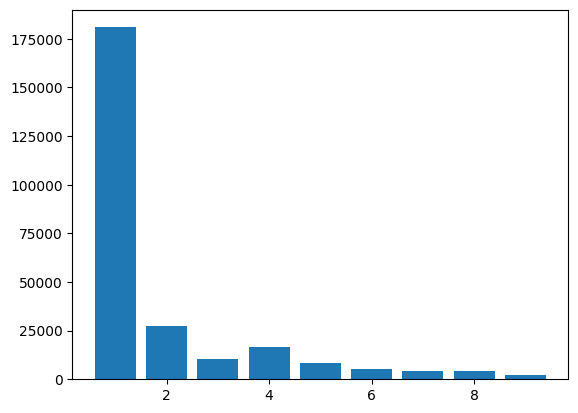

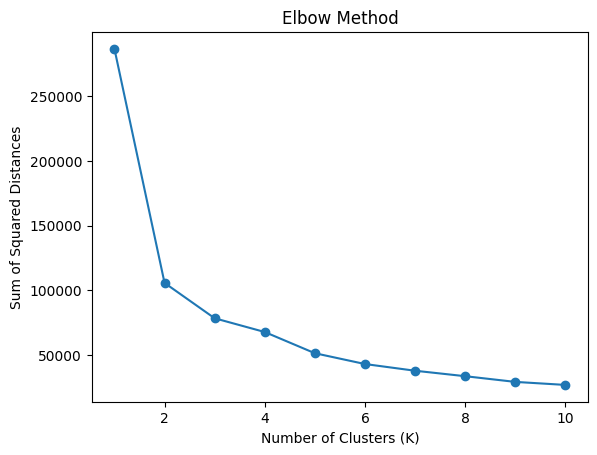

In [265]:
x = range(1, len(differences)+1)
plt.bar(x, differences)
plt.show()

# Plot the SSE values against K
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [37]:
# data0 =  data[labels == 0]
# data1 =  data[labels == 1]
# print(data0.shape[0], data1.shape[0])
# plt.scatter(data0.iloc[:, 1], data0.iloc[:, 2], s=5, color="blue")
# plt.scatter(data1.iloc[:, 1], data1.iloc[:, 2], s=5, color="red")
# plt.show

11943 8697


In [266]:
kmeans = KMeans(n_clusters=7, random_state=1027, n_init=1, max_iter=100)
labels = kmeans.fit_predict(dataset[['PC1', 'PC2']])
centers = kmeans.cluster_centers_
centers

array([[-0.93532984,  6.99805921],
       [ 2.78504266, -0.90990848],
       [-2.38328975,  1.55388312],
       [-3.6337832 , -1.17485139],
       [ 3.08561996,  1.77611659],
       [-1.87941831, -1.08847934],
       [ 5.06006711, -1.22672038]])

In [267]:
kmeans.inertia_

32818.87236797566

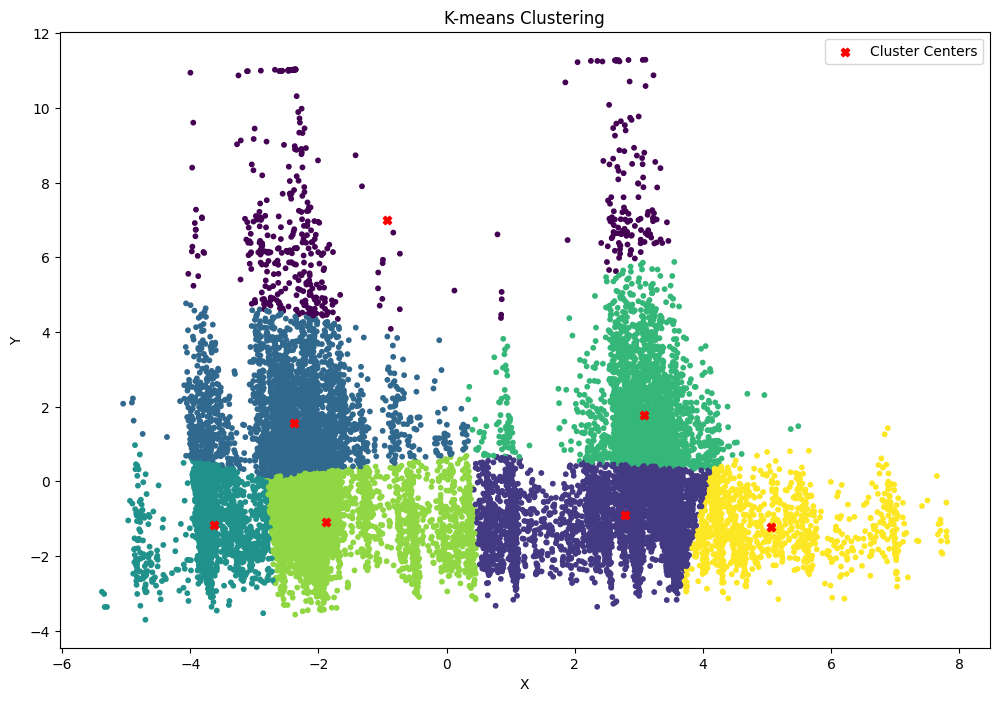

In [268]:
#colors=['green', 'blue', ]
#plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=[colors[label] for label in labels], s=5)
plt.figure(figsize=(12, 8))
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=labels, s=10)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker='X', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

## Improved K-means


In [ ]:
# Percentil formula
# def get_percentil(percentil: int, n: int) -> int:
#     return int((percentil / 100) * (n + 1))
# subsets = []
# for c in range(0,k):
#     ini = get_percentil(percentil*c, df.shape[0])
#     end = get_percentil(percentil*(c+1), df.shape[0])-1
#     width = 7
#     print(f"{ini:{width}} -> {end:{width}}")
    
#     subsets.append(firstComponent[ini:end])

In [269]:
k = 7

dataset2 = dataset
dataset2['quantile'] = pd.qcut(dataset2['PC1'], k, labels=False)

centroids = []
for c in range(0,k):
    centroids.append(np.mean( dataset2.loc[dataset2['quantile'] == c, ['PC1', 'PC2']], axis= 0))

centroids = pd.DataFrame(centroids)
centroids

,PC1,PC2
0,-3.429012,0.115956
1,-2.425308,0.474480
2,-2.095188,-0.374014
3,-1.399452,-0.335751
4,1.977038,0.120547
5,3.219392,0.626592
6,4.152326,-0.627550


In [270]:
def kmeans(X, n_clusters, centroids, max_iterations=100):
    
    for _ in range(max_iterations):
        # Assign data points to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Check if centroids have converged
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

def calculate_inertia(X, centroids, labels):
    inertia = 0.0
    for i, centroid in enumerate(centroids):
        distances = np.linalg.norm(X[labels == i] - centroid, axis=1)
        inertia += np.sum(distances ** 2)
    return inertia

In [273]:
labels, new_centroids = kmeans(X= dataset[['PC1', 'PC2']].values, n_clusters=k, centroids=centroids.values)

new_centroids

array([[-2.47126809, -1.27522725],
       [-2.50657521,  5.09428941],
       [-2.4063118 ,  1.04145687],
       [ 0.51413875, -1.21758788],
       [ 3.13912381,  1.03616594],
       [ 2.90385837,  4.70720706],
       [ 3.69988607, -1.14259223]])

In [274]:
calculate_inertia(X= dataset[['PC1', 'PC2']].values, centroids=new_centroids, labels=labels)

28799.816935207087

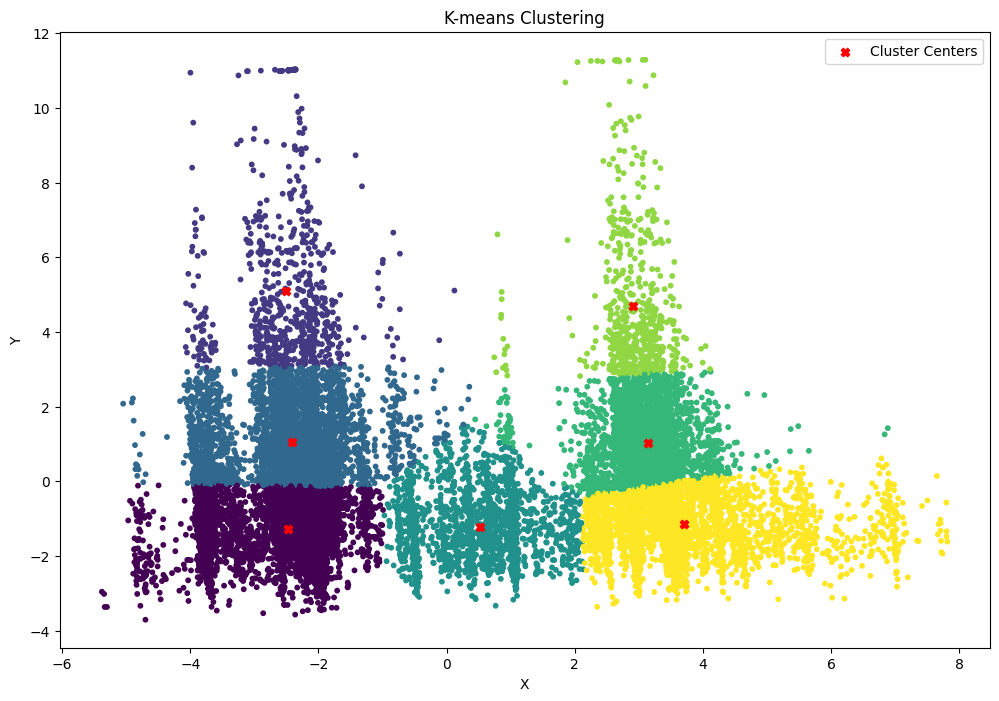

In [276]:
plt.figure(figsize=(12, 8))
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=labels, s=10)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c="red", marker='X', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()